In [19]:
%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.append(os.path.abspath(os.path.join("..")))
import pandas as pd
from scripts.correlation_analysis import CorrelationAnalysis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


- **Load the Data**

In [20]:
df_news = pd.read_csv("../data/raw_analyst_ratings.csv")
df_stock = pd.read_csv("../data/yfinance_data/AAPL_historical_data.csv")
# Drop the auto-generated column 
df_news = df_news.drop(columns=['Unnamed: 0'])
print(df_news.columns)
print(df_stock.columns)
ca = CorrelationAnalysis(df_news,df_stock)

Index(['headline', 'url', 'publisher', 'date', 'stock'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')


- Converting to the appropriate format

In [21]:
ca.normalize_date()

In [22]:
df_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [23]:

df_news.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A


### **Sentiment Analysis**

In [24]:
# Function to classify sentiment
ca.sentiment_analysis()

Aggregate Sentiment

In [32]:
# Group by date and compute average sentiment
ca.aggregate_sentiment()

,headline,url,publisher,date,stock,sentiment,avg_sentiment_x,avg_sentiment_y,avg_sentiment
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,0.0,0.110735,0.110735,0.110735
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A,0.0,0.073184,0.073184,0.073184
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A,0.0,0.079446,0.079446,0.079446
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A,0.0,0.062068,0.062068,0.062068
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A,0.0,0.062068,0.062068,0.062068


### **Date Alignment**

In [34]:
ca.align_date()



,headline,url,publisher,stock,sentiment,avg_sentiment_x,avg_sentiment_y,avg_sentiment,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,0.000000,0.110735,0.110735,0.110735,2020-06-05,80.837502,82.937500,80.807503,82.875000,80.843407,137250400,0.0,0.0
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,0.000000,0.073184,0.073184,0.073184,2020-06-03,81.165001,81.550003,80.574997,81.279999,79.287506,104491200,0.0,0.0
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,0.000000,0.079446,0.079446,0.079446,2020-05-26,80.875000,81.059998,79.125000,79.182503,77.241432,125522000,0.0,0.0
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,0.000000,0.062068,0.062068,0.062068,2020-05-22,78.942497,79.807503,78.837502,79.722504,77.768188,81803200,0.0,0.0
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,0.000000,0.062068,0.062068,0.062068,2020-05-22,78.942497,79.807503,78.837502,79.722504,77.768188,81803200,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55225,Chinese Nano-Cap Momentum Stocks Sharply Highe...,https://www.benzinga.com/movers/18/01/10994518...,Paul Quintaro,ZX,0.046591,-0.001166,-0.001166,-0.001166,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.214230,94640000,0.0,0.0
55226,28 Stocks Moving In Wednesday's Pre-Market Ses...,https://www.benzinga.com/news/17/12/10878295/2...,Lisa Levin,ZX,0.000000,0.091477,0.091477,0.091477,2017-12-06,41.875000,42.549999,41.615002,42.252499,39.803520,114240000,0.0,0.0
55227,China Zenix Auto International Reports Q3 EPAD...,https://www.benzinga.com/news/earnings/17/12/1...,Paul Quintaro,ZX,0.000000,0.091477,0.091477,0.091477,2017-12-06,41.875000,42.549999,41.615002,42.252499,39.803520,114240000,0.0,0.0
55228,46 Biggest Movers From Yesterday,https://www.benzinga.com/news/17/11/10788120/4...,Lisa Levin,ZX,0.000000,0.051870,0.051870,0.051870,2017-11-15,42.492500,42.580002,42.095001,42.270000,39.820007,116632400,0.0,0.0


### **Analysis**

In [35]:
# Calculate daily stock returns as the percentage change in closing prices

ca.calculate_correlation()

Correlation between avg_sentiment and daily return: -0.02491557402927364


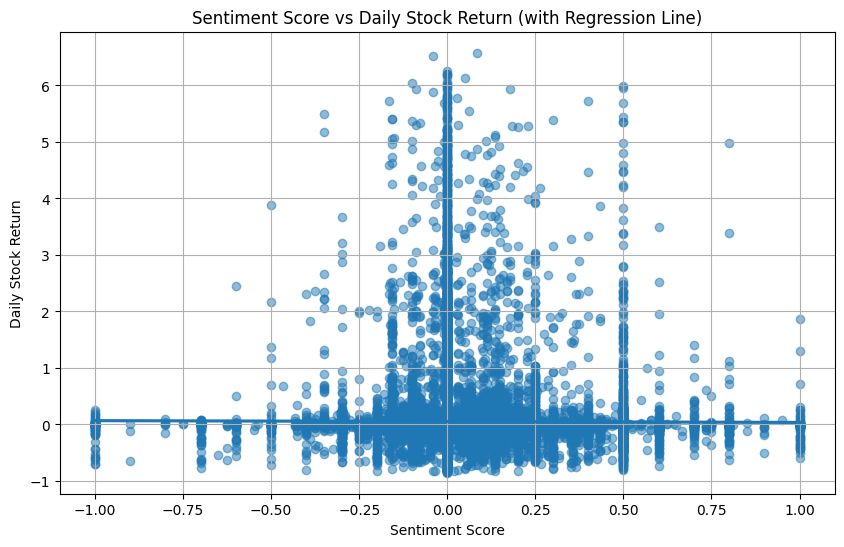

In [36]:
ca.plot_sentiment_vs_daily()

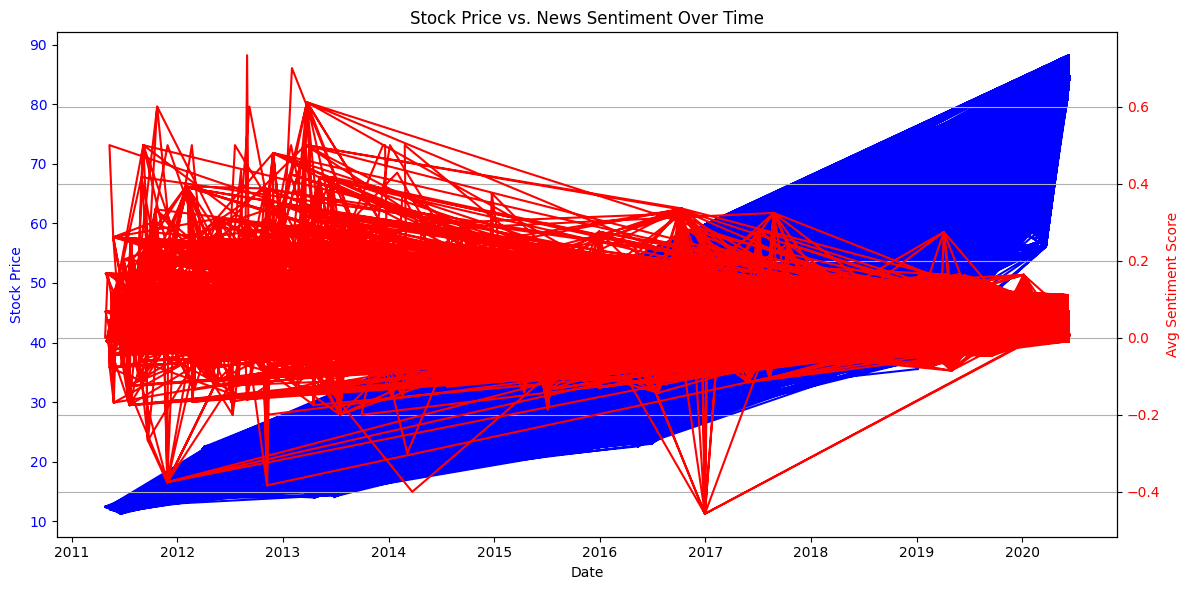

In [38]:
ca.plot_change()
